# Training of an agent on Acrobot with Dopamine

In [12]:
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install gin-config

     |████████████████████████████████| 61kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 28.7MB 2.6MB/s eta 0:00:01     |████████████▊                   | 11.4MB 2.8MB/s eta 0:00:07
     |████████████████████████████████| 1.6MB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 3.8MB/s eta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-8i_5l7am/wheels/75/01/fa/43ebcfe0f37d8c27bb1b7b6fa213caa0340e783fe754a2af8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8i_5l7am/wheels/ce/c8/46/5e7bf52dc31cb4fe1b541c27463b970150b2d8651105784a32
  Stored in directory: /tmp/pip-ephem-wheel-cache-8i_5l7am/wheels/8a/71/10/30f9b16332ecfd6318ac290445c696fe809bcbe40a05f9a799
Successfully built dopamine-rl gin-config gym


In [1]:
import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

/home/psaint/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/psaint/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/psaint/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/psaint/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
BASE_PATH = '/tmp/demo_acrobot'

## Train DQN Agent

In [3]:
DQN_PATH = os.path.join(BASE_PATH, 'dqn')

dqn_config = """

# Hyperparameters for a simple DQN-style Acrobot agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables

DQNAgent.observation_shape = %gym_lib.ACROBOT_OBSERVATION_SHAPE
DQNAgent.observation_dtype = %gym_lib.ACROBOT_OBSERVATION_DTYPE
DQNAgent.stack_size = %gym_lib.ACROBOT_STACK_SIZE
DQNAgent.network = @gym_lib.AcrobotDQNNetwork
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'Acrobot'
create_gym_environment.version = 'v1'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 100
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 500

WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config,skip_unknown = False)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [4]:
#Training of the agent
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')


INFO:tensorflow:Creating TrainRunner ...





INFO:tensorflow:Creating DQNAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 500
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 100
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7f9c01ee3438>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4

INFO:tensorflow:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (6, 1)
INFO:tensorflow:	 observation_dtype: <class 'numpy.float64'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 1
INFO:tensorflow:	 replay_capacity: 50000
IN



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:legacy_checkpoint_load: False


Will train DQN agent, please be patient, may be a while...
INFO:tensorflow:Beginning training...
INFO:tensorflow:Average undiscounted return per training episode: -500.00
INFO:tensorflow:Average training steps per second: 295.86


INFO:tensorflow:Average undiscounted return per training episode: -500.00
INFO:tensorflow:Average training steps per second: 187.85
INFO:tensorflow:Average undiscounted return per training episode: -500.00
INFO:tensorflow:Average training steps per second: 182.27
INFO:tensorflow:Average undiscounted return per training episode: -259.25
INFO:tensorflow:Average training steps per second: 192.60
INFO:tensorflow:Average undiscounted return per training episode: -132.62
INFO:tensorflow:Average training steps per second: 199.60
Instructions for updating:
U

INFO:tensorflow:Average undiscounted return per training episode: -85.83
INFO:tensorflow:Average training steps per second: 196.57
INFO:tensorflow:Average undiscounted return per training episode: -95.73
INFO:tensorflow:Average training steps per second: 191.91
INFO:tensorflow:Average undiscounted return per training episode: -118.56
INFO:tensorflow:Average training steps per second: 188.57
INFO:tensorflow:Average undiscounted return per training episode: -82.50
INFO:tensorflow:Average training steps per second: 185.69
INFO:tensorflow:Average undiscounted return per training episode: -98.18
INFO:tensorflow:Average training steps per second: 199.66
INFO:tensorflow:Average undiscounted return per training episode: -87.33
INFO:tensorflow:Average training steps per second: 202.37
INFO:tensorflow:Average undiscounted return per training episode: -123.55
INFO:tensorflow:Average training steps per second: 203.05
INFO:tensorflow:Average undiscounted return per training episode: -84.92
INFO:ten

INFO:tensorflow:Average training steps per second: 217.32
INFO:tensorflow:Average undiscounted return per training episode: -81.92
INFO:tensorflow:Average training steps per second: 219.11
INFO:tensorflow:Average undiscounted return per training episode: -83.00
INFO:tensorflow:Average training steps per second: 218.96
INFO:tensorflow:Average undiscounted return per training episode: -78.31
INFO:tensorflow:Average training steps per second: 220.84
INFO:tensorflow:Average undiscounted return per training episode: -80.00
INFO:tensorflow:Average training steps per second: 221.45
INFO:tensorflow:Average undiscounted return per training episode: -84.50
INFO:tensorflow:Average training steps per second: 220.69
INFO:tensorflow:Average undiscounted return per training episode: -77.62
INFO:tensorflow:Average training steps per second: 216.82
INFO:tensorflow:Average undiscounted return per training episode: -77.36
INFO:tensorflow:Average training steps per second: 221.27
INFO:tensorflow:Average u

## Train Rainbow Agent

In [5]:
RAINBOW_PATH = os.path.join(BASE_PATH, 'rainbow')
rainbow_config = """
# Hyperparameters for a simple Rainbow-style Acrobot agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.agents.rainbow.rainbow_agent
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.replay_memory.prioritized_replay_buffer
import gin.tf.external_configurables

RainbowAgent.observation_shape = %gym_lib.ACROBOT_OBSERVATION_SHAPE
RainbowAgent.observation_dtype = %gym_lib.ACROBOT_OBSERVATION_DTYPE
RainbowAgent.stack_size = %gym_lib.ACROBOT_STACK_SIZE
RainbowAgent.network = @gym_lib.AcrobotRainbowNetwork
RainbowAgent.num_atoms = 51
RainbowAgent.vmax = 10.
RainbowAgent.gamma = 0.99
RainbowAgent.update_horizon = 3
RainbowAgent.min_replay_history = 500
RainbowAgent.update_period = 4
RainbowAgent.target_update_period = 100
RainbowAgent.epsilon_fn = @dqn_agent.identity_epsilon
RainbowAgent.replay_scheme = 'prioritized'
RainbowAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
RainbowAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.09
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'Acrobot'
create_gym_environment.version = 'v1'
create_agent.agent_name = 'rainbow'
Runner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 500
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 500

WrappedPrioritizedReplayBuffer.replay_capacity = 50000
WrappedPrioritizedReplayBuffer.batch_size = 128"""

In [7]:
#Training of the agent
rainbow_runner = run_experiment.create_runner(RAINBOW_PATH, schedule='continuous_train')
print('Will train Rainbow agent, please be patient, may be a while...')
rainbow_runner.run_experiment()
print('Done training!')

INFO:tensorflow:Creating TrainRunner ...
INFO:tensorflow:Creating DQNAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 500
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 100
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7f9bb4268358>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4
INFO:tensorflow:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (6, 1)
INFO:tensorflow:	 observation_dtype: <class 'numpy.float64'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 1
INFO:tensorflow:	 replay_capacity: 50000
INFO:tens

INFO:tensorflow:Average undiscounted return per training episode: -500.00
INFO:tensorflow:Average training steps per second: 201.19
INFO:tensorflow:Average undiscounted return per training episode: -188.83
INFO:tensorflow:Average training steps per second: 198.67
INFO:tensorflow:Average undiscounted return per training episode: -140.00
INFO:tensorflow:Average training steps per second: 197.98
INFO:tensorflow:Average undiscounted return per training episode: -143.43
INFO:tensorflow:Average training steps per second: 193.76
INFO:tensorflow:Average undiscounted return per training episode: -151.29
INFO:tensorflow:Average training steps per second: 201.27
INFO:tensorflow:Average undiscounted return per training episode: -149.25
INFO:tensorflow:Average training steps per second: 202.63
INFO:tensorflow:Average undiscounted return per training episode: -136.12
INFO:tensorflow:Average training steps per second: 200.07
INFO:tensorflow:Average undiscounted return per training episode: -126.38
IN

INFO:tensorflow:Average undiscounted return per training episode: -100.30
INFO:tensorflow:Average training steps per second: 211.93
INFO:tensorflow:Average undiscounted return per training episode: -90.64
INFO:tensorflow:Average training steps per second: 211.18
INFO:tensorflow:Average undiscounted return per training episode: -76.69
INFO:tensorflow:Average training steps per second: 210.31
INFO:tensorflow:Average undiscounted return per training episode: -80.15
INFO:tensorflow:Average training steps per second: 213.31
INFO:tensorflow:Average undiscounted return per training episode: -87.33
INFO:tensorflow:Average training steps per second: 208.95
INFO:tensorflow:Average undiscounted return per training episode: -110.22
INFO:tensorflow:Average training steps per second: 212.41
INFO:tensorflow:Average undiscounted return per training episode: -91.91
INFO:tensorflow:Average training steps per second: 211.48
INFO:tensorflow:Average undiscounted return per training episode: -91.91
INFO:ten

# Display results

In [8]:
# @title Load the training logs.
data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                   summary_keys=['train_episode_returns'])
data['agent'] = 'DQN'
data['run'] = 1
rainbow_data = colab_utils.read_experiment(RAINBOW_PATH, verbose=True,
                                       summary_keys=['train_episode_returns'])
rainbow_data['agent'] = 'RAINBOW'
rainbow_data['run'] = 1
data = data.merge(rainbow_data, how='outer')

Reading statistics from: /tmp/demo_acrobot/dqn//logs/log_99
Reading statistics from: /tmp/demo_acrobot/rainbow//logs/log_99


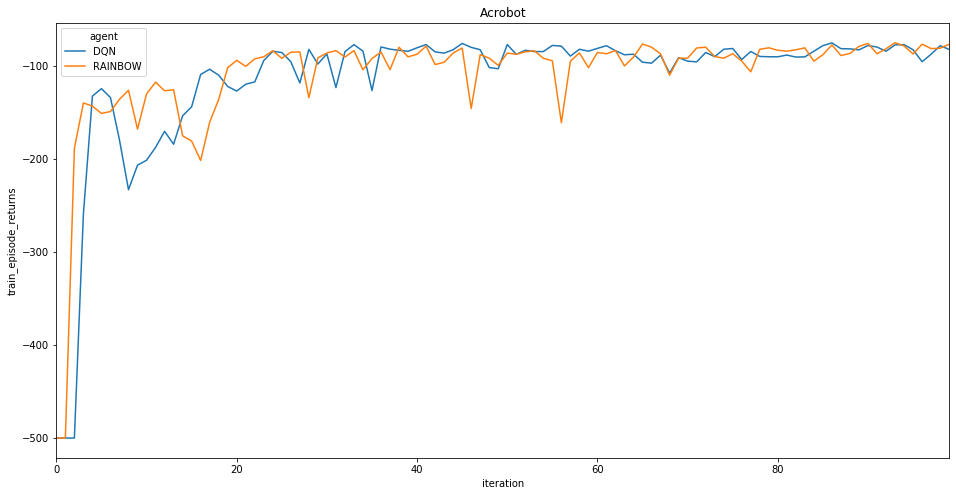

In [10]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=data, time='iteration', unit='run',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title('Acrobot')
plt.show()